<a href="https://colab.research.google.com/github/minjeon99/ESAA-10th-OB/blob/Week7/w7_mon_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **09 추천 시스템**

## **1. 추천 시스템의 개요와 배경**

### **추천 시스템의 개요**
추천 시스템(Recommendations)
- 아마존 등과 같은 전자상거래 업체 ~ 유튜브, 애플 뮤직 등 콘텐츠 포털
- 추천 시스템을 통해 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠를 제공해 고객을 오래 머무르게 하기 위함

### **온라인 스토어의 필수 요소, 추천 시스템**
- 좋은 추천 시스템은 사용자가 무엇을 원하는지 빠르게 찾아내, 사용자의 온라인 쇼핑의 즐거움을 늘림
- 추천 시스템 구성에 사용될 수 있는 데이터
  - 사용자가 어떤 상품을 구매했는가?
  - 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
  - 사용자가 평가한 영화 평점은? 제품 평가는?
  - 사용자가 스스로 작성한 자신의 취향은?
  - 사용자가 무엇을 클릭했는가?

  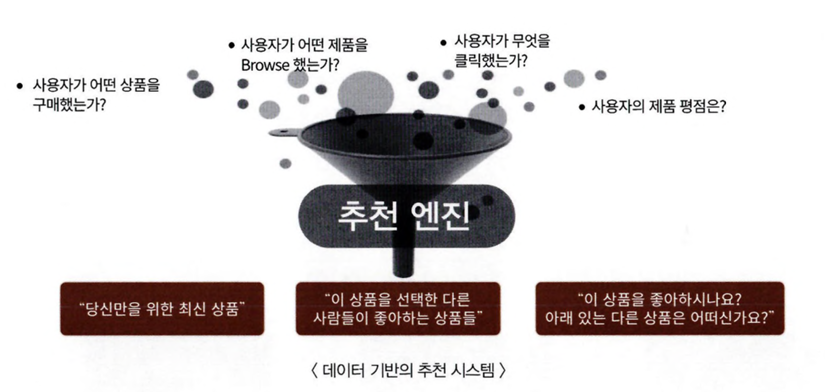

### **추천 시스템의 유형**
- 콘텐츠 기반 필터링(Content based filtering) 방식
- 협업 필터링(Collaborative Filtering) 방식
  - 최근접 이웃(Nearest Neighbor) 협업 필터링
  - 잠재 요인(Latent Factor) 협업 필터링

초창기에는 콘텐츠 기반/최근접 이웃 기반 협업 필터링이 주로 사용됐지만,

넷플릭스 추천 시스템 경연 대회에서 행렬 분해(Matrix Factorization) 기법을 이용한 잠재 요인 협업 필터링 방식이 우승하면서 대부분의 온라인 스토어가 잠재 요인 협업 필터링 기반의 추천 시스템 적용
- 서비스 아이템의 특성에 따라 다른 방식을 유지하는 경우도 여전히 많음
  - 아마존은 아직도 아이템 기반 최근접 이웃 협업 필터링 방식을 사용
- 개인화 특성을 강화하기 위해서 하이브리드 형식으로 콘텐츠 기반 + 협업 기반 결합해 사용하는 경우도 늘어남

## **2. 콘텐츠 기반 필터링 추천 시스템**
- 사용자가 특정 아이템을 선호하는 경우, 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

  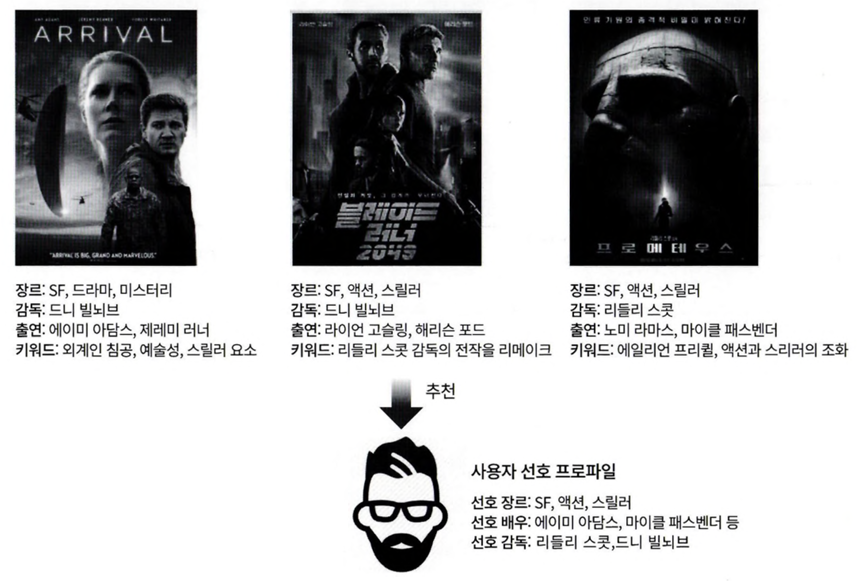

## **3. 최근접 이웃 협업 필터링**
영화를 본 친구들(단, 취향이 비슷한 친구들)에게 영화가 어땠는지를 물어보는 것과 유사한 방식

**협업 필터링(Collaborative Filtering)**: 사용자가 아이템에 매긴 평점 정보, 상품 구매 이력과 같은 사용자 행동 양식(User Behavior) 기반 추천
- 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터 기반, 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하기

  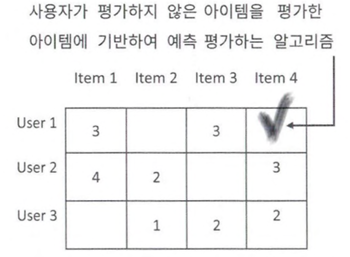

**협업 필터링 기반 추천 시스템의 두 가지 방식**
1. 최근접 이웃 방식
2. 잠재 요인 방식
- 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천 수행

**사용자-아이템 평점 행렬**
- 행(Row): 개별 사용자
- 열(Column): 개별 아이템
- 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값 => 평점
  - 만약 왼쪽과 같은 레코드 레벨 형태의 데이터라면, pandas의 pivot_table() 등을 이용해 오른쪽 형태로 변경

  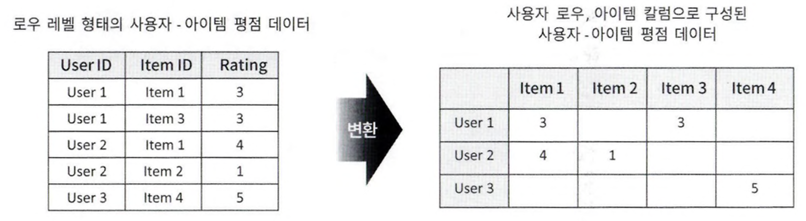
- 일반적으로 많은 열을 가지는 다차원 행렬 & 사용자가 남긴 평점이 적으므로 희소 행렬(Sparse Matrix) 특성

**최근접 이웃 협업 필터링**
- 메모리(Memory) 협업 필터링이라고도 함
- 2가지 방식으로 다시 나뉨
1. **사용자 기반(User-User)**: 당신과 비슷한 고객들이 다음 상품도 구매했습니다.(Customers like you also bought these items)
  - 특정 사용자와 타 사용자 간의 유사도(Similarity) 측정 ➡️ 가장 유사도가 높은 Top-N 사용자 추출 ⏩ 그들이 선호하는 아이템 추천

  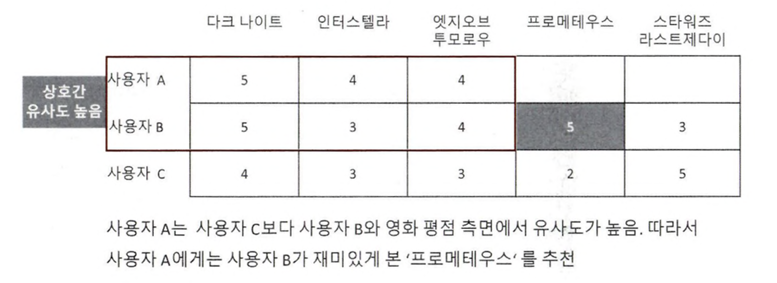
2. **아이템 기반(Item-Item)**: 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다.(Customers who bought this item also bought these items)
  - '아이템 간의 속성'이 얼마나 비슷한지를 기반으로 추천한다는 착각 ❌
  - 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘 ⭕

  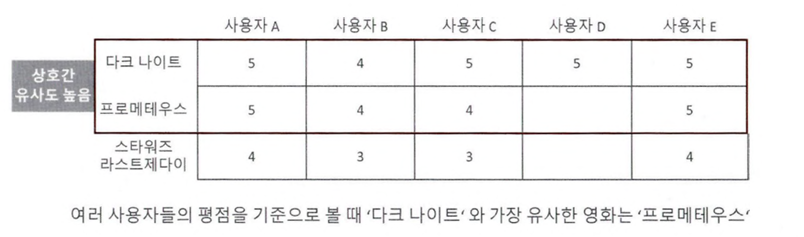
  - 사용자 기반 최근접 이웃 데이터 세트와 행 <-> 열 반대

- 일반적으로 사용자 기반 < **아이템** 기반 협업 필터링의 정확도
  - 비슷한 영화(상품)를 좋아한다고 해서 사람들의 취향이 비슷하다고 판단하기는 어려움
  - 유명한 영화(상품)는 취향과 관계없이 대부분 관람하는 경우가 많음
  - 사용자들이 평점을 매긴 영화(상품)가 많지 않은 경우가 일반적인데, 이를 기반으로 유사도를 비교하기 어려움
- 추천 시스템의 유사도 측정에는 **코사인 유사도**가 가장 많이 적용됨
  - 피처 벡터화된 텍스트 데이터와 동일하게 다차원 희소 행렬이라는 특징이 있기 때문

## **4. 잠재 요인 협업 필터링**

### **잠재 요인 협업 필터링의 이해**
- 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
- 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출
  
  ➡️ **행렬 분해(Matrix Factorization)**

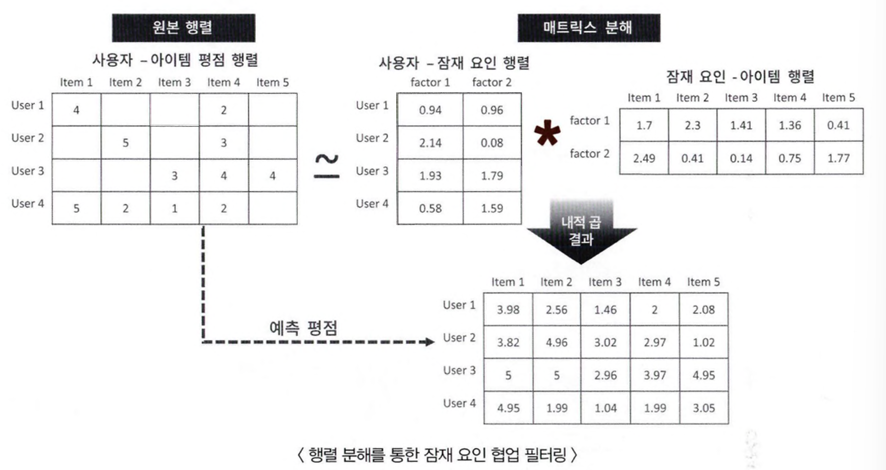

**주요 알고리즘**
- 사용자-아이템 평점 행렬 데이터만을 이용해 '잠재 요인'을 끄집어내는 것
  1. 잠재 요인을 기반으로 저차원 밀집 행렬의 사용자-잠재 요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬(잠재 요인-아이템 행렬)로 분해
  2. 분해된 두 행렬의 내적으로 새로운 예측 사용자-아이템 평점 행렬 데이터 생성
  3. 사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점 생성

- 행렬 분해에 의해 추출되는 '잠재 요인'이 정확히 어떤 것인지는 알 수 없지만,

  가령 영화 평점 기반의 사용자-아이템 평점 행렬 데이터라면 영화가 가지는 장르별 특성 선호도로 가정
  - (사용자-잠재 요인 행렬➡️사용자의 영화 장르에 대한 선호도), (아이템-잠재 요인 행렬➡️영화의 장르별 특성값)으로 정의

- **사용자-아이템 평점 행렬 R**: 사용자(User)의 아이템(Item)에 대한 평점 **`R(u, i)`**
- **사용자-잠재 요인 행렬 P**: 사용자(User)의 영화 장르별 선호도(=잠재 요인, k) **`P(u, k)`**
- **아이템-잠재 요인 행렬 Q**: 여러 장르 요소로 구성된 영화(Item)의 장르별 요소(=잠재 요인, k) **`Q(i, k)`**

  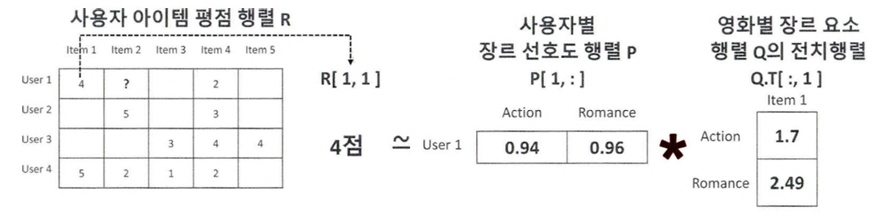
- **평점**: 사용자의 장르별 선호도(P)와 개별 영화의 장르적 특성값(Q.T)을 반영해 결정됨
  
  ⏩ P와 Q.T의 내적 계산을 통해 예측 평점 계산

  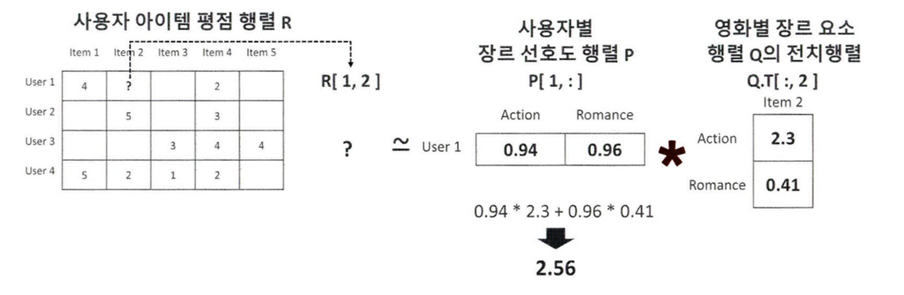

### **행렬 분해의 이해**
- **행렬 분해**: 다차원 매트릭스를 저차원 매트릭스로 분해하는 기법
  - 대표적으로 SVD(Singular Vector Decomposition), NMF(Non-Negative Matrix Factorization)

  *Factorization* = '인수분해'
  - 하나의 복잡한 다항식을 두 개 이상의 더 단순한 인수(factor)의 곱으로 분해
- M개의 사용자(User) 행, N개의 아이템(Item) 열을 가진 평점 행렬 R(M, N)
  - 행렬 분해를 통해 사용자-K차원 잠재 요인 행렬 P(M, K)와 K차원 잠재 요인-아이템 행렬 Q.T(K, N)로 분해

  ⏩ R = P * Q.T

  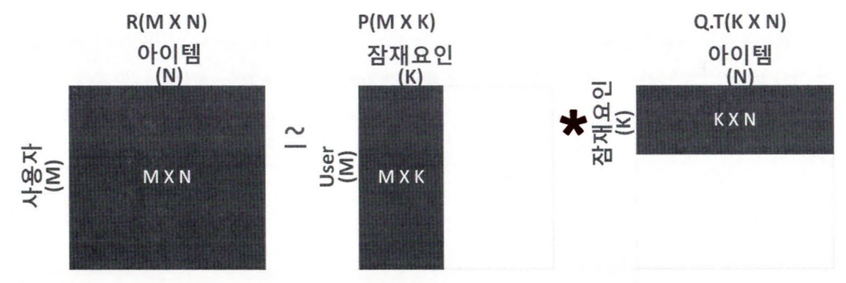
  - M: 총 사용자 수
  - N: 총 아이템 수
  - K: 잠재 요인의 차원 수
  - R: M x N 차원의 사용자-아이템 평점 행렬
  - P: M x K 차원의 사용자-잠재 요인 행렬
  - Q: N x K 차원의 아이템-잠재 요인 행렬

  ➡️ 널(NaN) 값이 많은 고차원 희소 행렬 R -> 저차원 밀집 행렬인 P, Q 행렬로 분해

  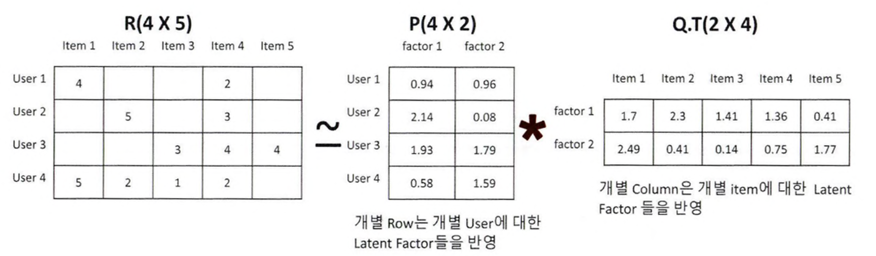

$$r_{(u,i)}=p_u * q_i^t$$
- R 행렬의 u행 사용자와 i열 아이템 위치에 있는 평점 데이터 $r_{(u,i)}$를 유추 가능

  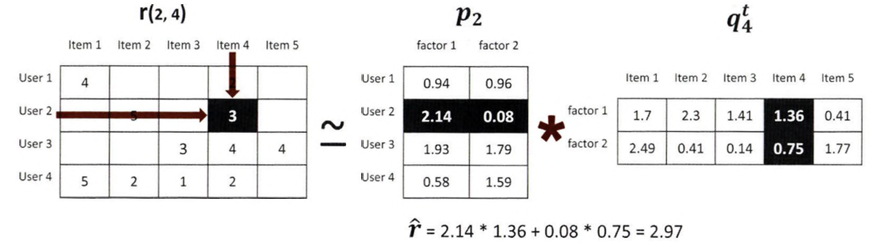

- 사용자가 평가하지 않은 아이템에 대한 평점도 분해된 P와 Q를 이용해 예측 가능

  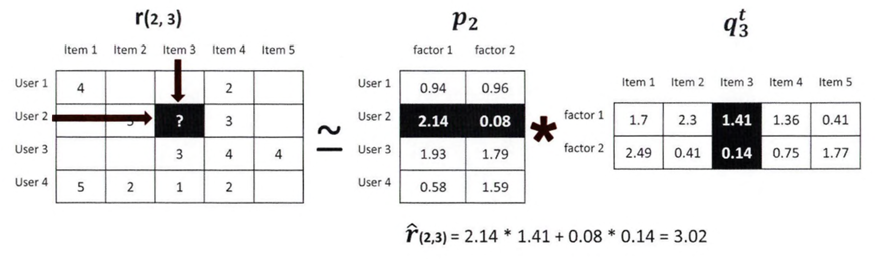

- 사용자-아이템 평점 행렬의 미정 값을 포함한 모든 평점 값: 행렬 분해로 나온 P 행렬과 Q.T 행렬의 내적 ➡️ 예측 평점으로 다시 계산 가능
$$R\cong\hat{R}=P*Q.T$$

  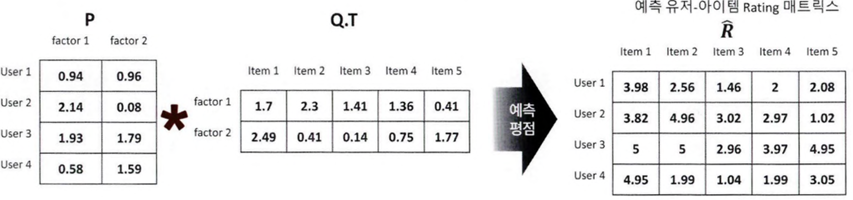

- R 행렬을 P와 Q 행렬로 분해하기
  - 행렬 분해에는 주로 **SVD(Singular Value Decomposition)** 방식을 이용하나,

    널(NaN)이 없는 행렬에만 적용 가능
  - R 행렬에는 아직 평점이 없는 많은 널값 존재 => P와 Q 행렬을 일반적인 SVD 방식으로는 분해할 수 ❌

  ⏩ **확률적 경사 하강법**(Stochastic Gradient Descent, SGD)나 **ALS**(Alternating Least Squares) 방식으로 SVD 수행

### **확률적 경사 하강법을 이용한 행렬 분해**
: P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q 유추하기
1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T를 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산
3. **오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트**
4. 만족할 만한 오류 값을 가질 때까지 2,3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화
- 실제 값과 예측 값의 오류 최소화와 L2 규제(Regularization)를 고려한 **비용 함수식**

  $$min\sum(r_{(u,i)}-p_uq_i^t)^2+\lambda(\lVert q_i\rVert^2+\lVert p_u\rVert^2)$$
  - 사용자-아이템 평점 행렬의 경우 과적합을 피하기 위해 **규제를 반영한** 비용 함수 적용
- 비용 함수의 최소화를 위해 업데이트되는 $\acute{p}_u$, $\acute{q}_i$
  - $\acute{p}_u=p_u+\eta(𝑒_{(u,i)}*q_i-\lambda*p_u)$
  - $\acute{q}_i=q_i+\eta(𝑒_{(u,i)}*p_u-\lambda*q_i)$
- 각 기호의 의미
  - $p_u$: P 행렬의 사용자 u행 벡터
  - $q_i^t$: Q 행렬의 아이템 i행의 전치 벡터
  - $r_{(u,i)}$: 실제 R 행렬의 u행, i열에 위치한 값
  - $\hat{r}_{(u,i)}$: 예측 $\hat R$ 행렬의 u행, i열에 위치한 값. $p_u * q_i^t$로 계산
  - $e_{(u,i)}$: u행, i열에 위치한 실제 행렬 값과 예측 행렬 값의 오류. $r_{(u,i)}-\hat r_{(u,i)}$로 계산
  - η: SGD 학습률
  - λ: L2 규제(Regularization) 계수

- **SGD 기반 행렬 분해**
  
  : L2 규제를 반영해 실제 R 행렬 값과 예측 R 행렬 값의 차이를 최소화하는 방향성을 가지고,

  P 행렬과 Q 행렬에 업데이트 값을 반복적으로 수행하면서 최적화된 예측 R 행렬을 구하기

In [4]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K=3
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN, np.NaN, 3, 4, 4],
              [5, 2, 1, 2, np.NaN]])
num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기 지정, 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [5]:
# 실제 R 행렬과 예측 R 행렬의 오차를 구하는 함수
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출 -> 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [8]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]

steps = 1000 # SGD 반복 횟수
learning_rate = 0.01 # SGD의 학습률
r_lambda = 0.01 # L2 Regularization 계수

# SGD 기법으로 P와 Q 행렬 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 계산
    eij = r - np.dot(P[i, :], Q[j, :].T)
    # Regularization 반영한 SGD 공식 적용
    P[i, :] = P[i, :] + learning_rate * (eij * Q[j, :] - r_lambda * P[i, :])
    Q[j, :] = Q[j, :] + learning_rate * (eij * P[i, :] - r_lambda * Q[j, :])

  rmse = get_rmse(R, P, Q, non_zeros)
  if (step % 50) == 0:
    print("### iteration step:", step, " rmse:", rmse)

### iteration step: 0  rmse: 0.015841898233915897
### iteration step: 50  rmse: 0.01580353329524267
### iteration step: 100  rmse: 0.015765769520254456
### iteration step: 150  rmse: 0.015728618155937308
### iteration step: 200  rmse: 0.015692085687129802
### iteration step: 250  rmse: 0.015656174799476893
### iteration step: 300  rmse: 0.015620885158039641
### iteration step: 350  rmse: 0.015586214035362327
### iteration step: 400  rmse: 0.015552156817346556
### iteration step: 450  rmse: 0.015518707410342666
### iteration step: 500  rmse: 0.015485858568631126
### iteration step: 550  rmse: 0.015453602157900167
### iteration step: 600  rmse: 0.015421929367307238
### iteration step: 650  rmse: 0.015390830880288397
### iteration step: 700  rmse: 0.015360297012242426
### iteration step: 750  rmse: 0.015330317821609058
### iteration step: 800  rmse: 0.01530088319954696
### iteration step: 850  rmse: 0.015271982942363737
### iteration step: 900  rmse: 0.015243606810024603
### iteration ste

In [11]:
 pred_matrix = np.dot(P, Q.T)
 print('원본 행렬:\n', np.round(R, 3), '\n')
 print('예측 행렬:\n', np.round(pred_matrix, 3))

원본 행렬:
 [[ 4. nan nan  2. nan]
 [nan  5. nan  3.  1.]
 [nan nan  3.  4.  4.]
 [ 5.  2.  1.  2. nan]] 

예측 행렬:
 [[3.991 1.324 1.238 2.    1.64 ]
 [6.015 4.977 0.866 2.984 1.003]
 [6.224 1.13  2.987 3.978 3.986]
 [4.97  2.005 1.006 2.01  1.324]]


- 널이 아닌 값: 원본 행렬과 큰 차이가 나지 않음
- 널인 값: 새로운 예측값으로 채워짐